## CREATE AND CUT THE GRAPH

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install leidenalg==0.7.0

In [111]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy
import skimage.color
import torch.nn.functional as F
from MODULES.graph_clustering import *

## Import files

In [199]:
# LARGE
#mask_file = "/Users/ldalessi/DAPI_unsupervised/spacetx-research/LARGE_edges_tiling.pt"
#tiling = torch.load(mask_file, map_location=torch.device('cpu'))
#print(mask_file)

# DEBUG
#debug_file = "/Users/ldalessi/DAPI_unsupervised/spacetx-research/merfish_segment_june27_v2/DEBUG.pt"
#mask, co_obj, raw = torch.load(debug_file, map_location=torch.device('cpu'))
#g_small = GraphSegmentation(TILING(co_obj[0], raw))


# SMALL
mask_file = "/Users/ldalessi/DAPI_unsupervised/spacetx-research/merfish_segment_june27_v2/NEW_tiling.pt"
tiling = torch.load(mask_file, map_location=torch.device('cpu'))
print(mask_file)

/Users/ldalessi/DAPI_unsupervised/spacetx-research/merfish_segment_june27_v2/NEW_tiling.pt


In [200]:
print(tiling.co_object.shape)
print(tiling.raw_img.shape)

torch.Size([121, 100, 100])
torch.Size([1, 100, 100])


# Community detection

In [201]:
g_small = GraphSegmentation(tiling)

radius_nn -> 5
ch_e_ii --> 60
n_fg_pixel --> 2918


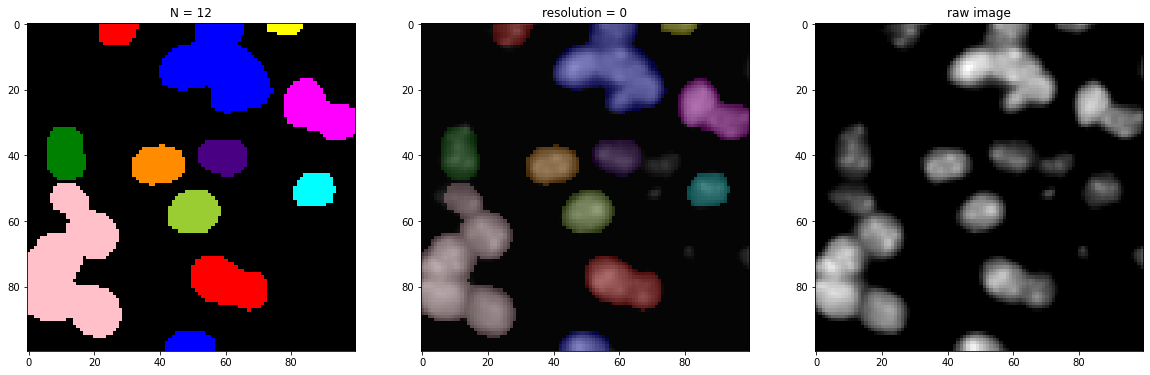

In [202]:
disc_components = g_small.graph.clusters(mode="STRONG")
c=g_small.partition_2_community(disc_components)
g_small.plot_community(c, figsize=(20,20))

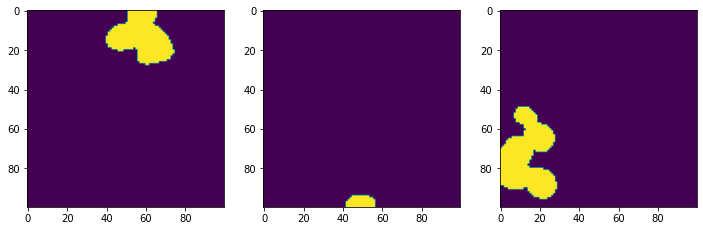

In [203]:
figure, axes = plt.subplots(ncols=3, figsize=(12,12))
axes[0].imshow(c.mask==2)
axes[1].imshow(c.mask==12)
axes[2].imshow(c.mask==9)

### Analyze the graph all at once

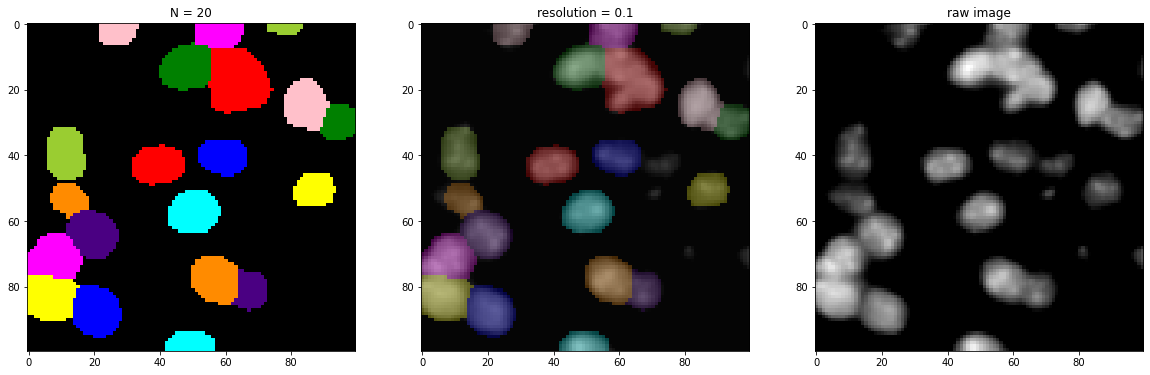

In [216]:
partition = g_small.find_partition(resolution=0.1)
community = g_small.partition_2_community(partition, size_threshold=10)
g_small.plot_community(community, figsize=(20,20))

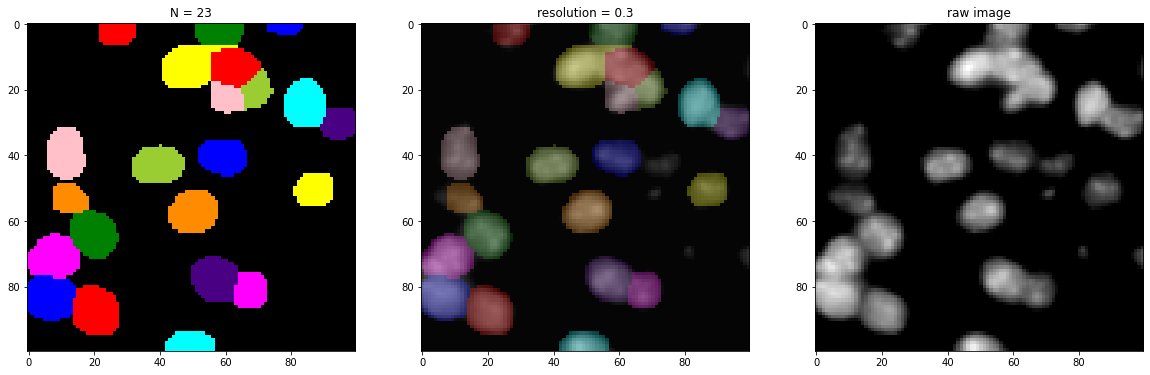

In [217]:
partition = g_small.find_partition(resolution=0.3)
community = g_small.partition_2_community(partition, size_threshold=10)
g_small.plot_community(community, figsize=(20,20))

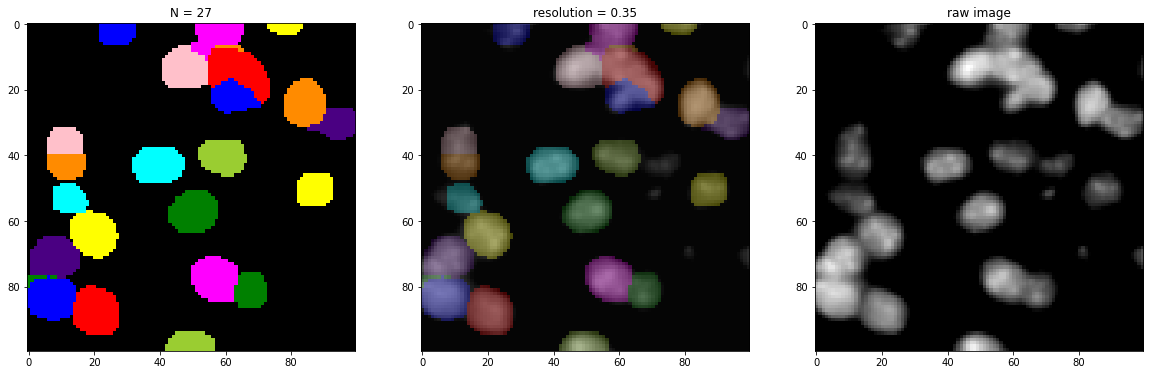

In [220]:
partition = g_small.find_partition(resolution=0.35)
community = g_small.partition_2_community(partition, size_threshold=10)
g_small.plot_community(community, figsize=(20,20))

# MAKE PLOT OF RESOLUTION PARAMETER VS N_OBJECT

In [218]:
asser 1==2

SyntaxError: invalid syntax (<ipython-input-218-ecfb96827884>, line 1)

21


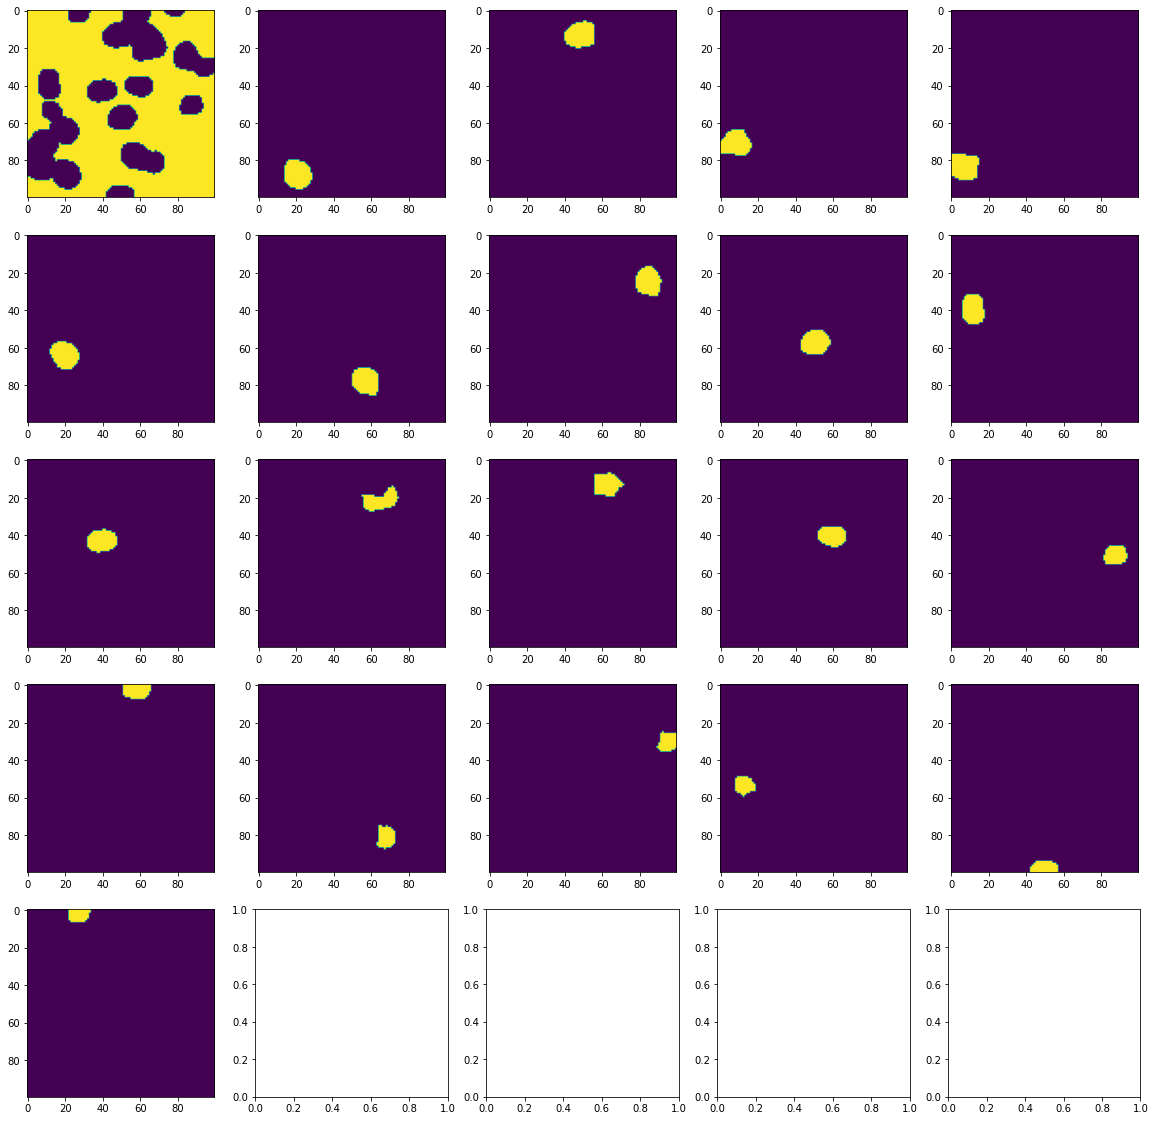

In [198]:
print(community.n)
ncols, max_row = 5,5
figure, axes = plt.subplots(ncols=ncols, nrows=max_row, figsize=(20,20))
for n in range(community.n):
    row = n//ncols
    col = n % ncols
    axes[row, col].imshow(community.mask == n)

print(community.n)
ncols, max_row = 5,5
figure, axes = plt.subplots(ncols=ncols, nrows=max_row, figsize=figsize)
for n in range(community.n):
    row = n//ncols
    col = n % ncols
    axes[row, col].imshow(community.mask == n)

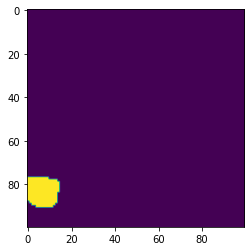

In [191]:
plt.imshow(community.mask ==)

In [101]:
partition = g_small.find_partition(resolution=0.04)
community = g_small.partition_2_community(partition, size_threshold=10)

22


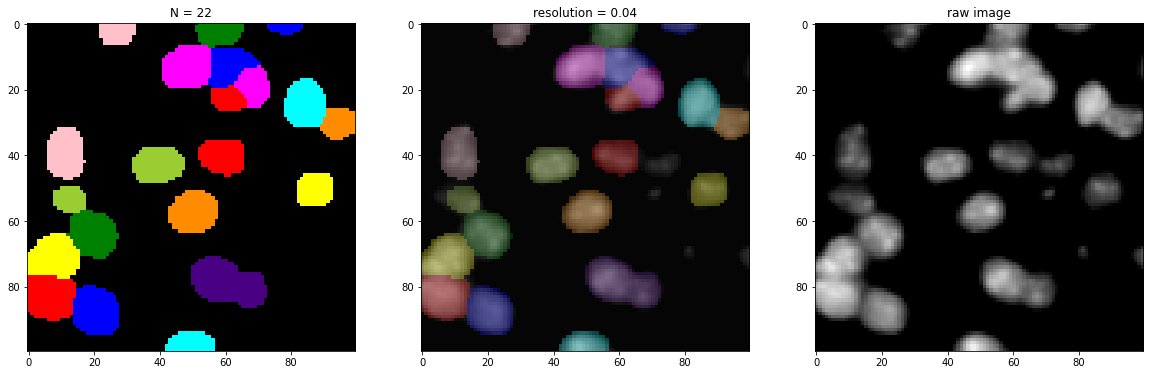

In [102]:
print(community.n)
g_small.plot_community(community, figsize=(20,20))

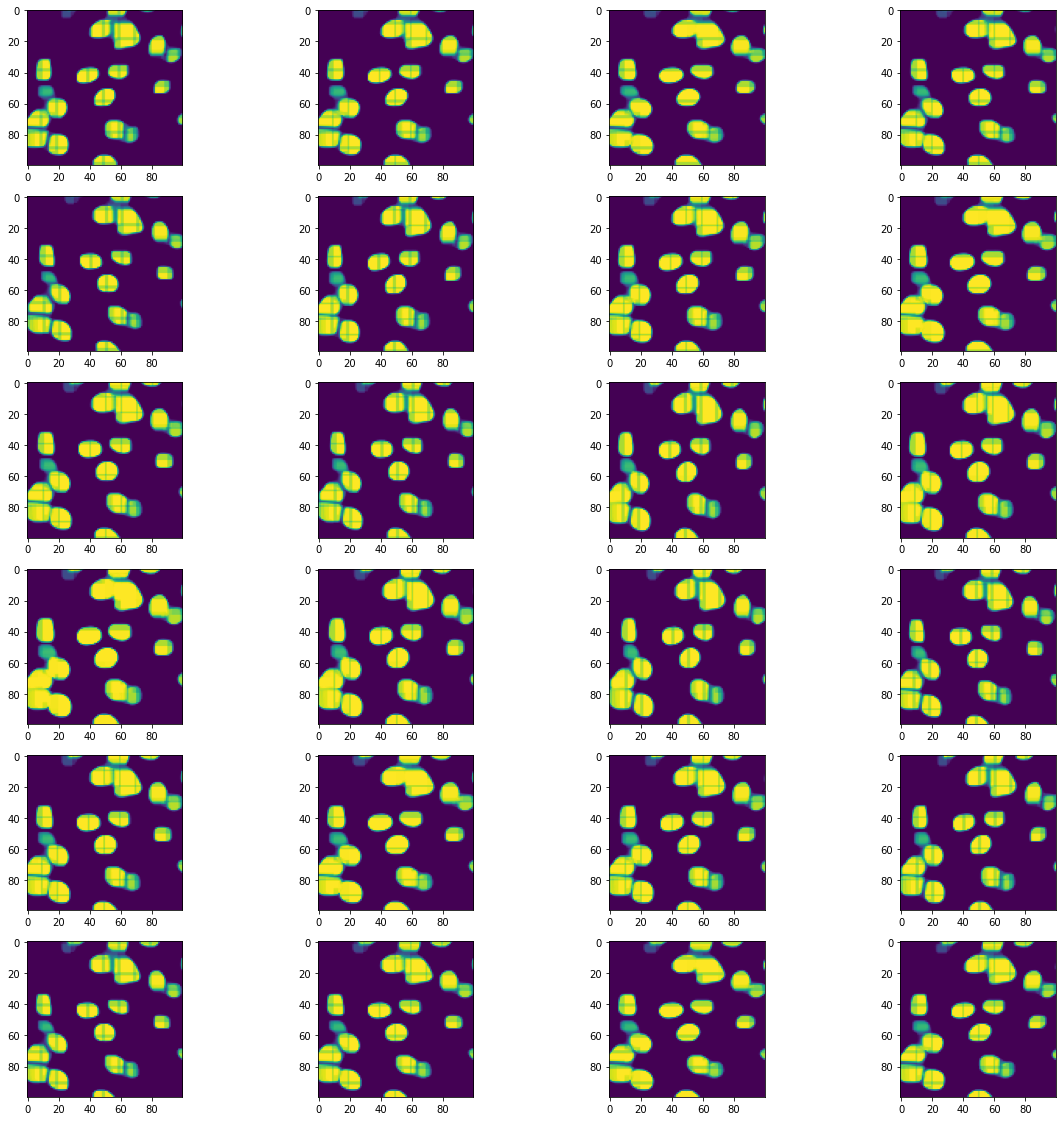

In [103]:
plot_grid(tiles.co_objectiveness, figsize=(20,20))

## Find connected components

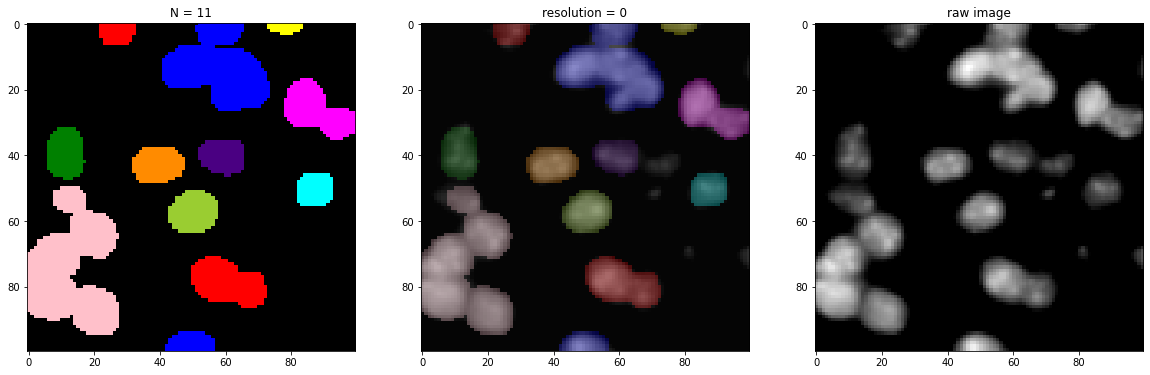

In [104]:
partition = g_small.graph.clusters(mode="STRONG")
c=g_small.partition_2_community(partition)
g_small.plot_community(c, figsize=(20,20))

In [83]:
numpy.max(c.mask)

12

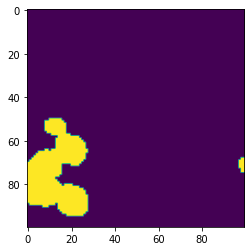

In [86]:
plt.imshow(c.mask==10)

In [78]:
c.n

11

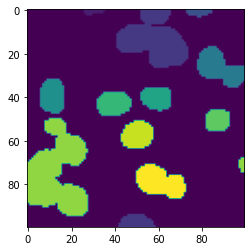

In [77]:
plt.imshow(c.mask)

In [ ]:
profile = g_small.find_profile(resolution_range=(0.01,0.5))

In [ ]:
masks = g_small.profile_2_seg_masks(profile, size_threshold=10)
g_small.plot_seg_masks(masks, ncols=4, figsize=(20,20))

In [ ]:
profile[0].

In [ ]:
profile

In [ ]:
G = ig.Graph.Famous('Zachary')
optimiser = la.Optimiser()
profile_z = optimiser.resolution_profile(G, la.CPMVertexPartition,
                                       resolution_range=(0,1))

In [ ]:
for partition in profile_z:
    print(partition.modularity, partition.resolution_parameter)
    
numpy.sum(numpy.array(profile_z[4].sizes()) > 10)

In [ ]:
numpy.sum(numpy.array(profile_z[4].sizes()) > 10)


In [ ]:
profile_z[4].resolution_parameter